# Hate Speech detection

In [6]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the CSV file
df = pd.read_csv('train.csv')

# Text Preprocessing 

In [8]:
# Lowercasing
df['tweet'] = df['tweet'].str.lower()

# Tokenization
nltk.download('punkt')
df['tokens'] = df['tweet'].apply(word_tokenize)

# Removing Punctuations
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in string.punctuation])

# Removing Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df['tokens'] = df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

# Lemmatization
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['tokens'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Removing Numbers
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if not word.isdigit()])

# Removing White Spaces
df['tweet'] = df['tweet'].str.strip()
df['tokens'] = df['tokens'].apply(lambda x: [word.strip() for word in x])

# Joining tokens back to text
df['processed_text'] = df['tokens'].apply(lambda x: ' '.join(x))

df.head(20)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\parne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,tokens,processed_text
0,3,0,0,3,2,!!! rt @mayasolovely: as a woman you shouldn't...,"[rt, mayasolov, woman, n't, complain, clean, h...",rt mayasolov woman n't complain clean hous amp...
1,3,0,3,0,1,!!!!! rt @mleew17: boy dats cold...tyga dwn ba...,"[rt, mleew17, boy, dat, cold, ..., tyga, dwn, ...",rt mleew17 boy dat cold ... tyga dwn bad cuffi...
2,3,0,3,0,1,!!!!!!! rt @urkindofbrand dawg!!!! rt @80sbaby...,"[rt, urkindofbrand, dawg, rt, 80sbaby4lif, eve...",rt urkindofbrand dawg rt 80sbaby4lif ever fuck...
3,3,0,2,1,1,!!!!!!!!! rt @c_g_anderson: @viva_based she lo...,"[rt, c_g_anderson, viva_bas, look, like, tranni]",rt c_g_anderson viva_bas look like tranni
4,6,0,6,0,1,!!!!!!!!!!!!! rt @shenikaroberts: the shit you...,"[rt, shenikarobert, shit, hear, might, true, m...",rt shenikarobert shit hear might true might fa...
5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@t_madison_x: the shit just...","[``, t_madison_x, shit, blow, .., claim, faith...",`` t_madison_x shit blow .. claim faith somebo...
6,3,0,3,0,1,"!!!!!!""@__brighterdays: i can not just sit up ...","[``, __brighterday, sit, hate, anoth, bitch, ....",`` __brighterday sit hate anoth bitch .. got m...
7,3,0,3,0,1,!!!!&#8220;@selfiequeenbri: cause i'm tired of...,"[selfiequeenbri, caus, 'm, tire, big, bitch, c...",selfiequeenbri caus 'm tire big bitch come u s...
8,3,0,3,0,1,""" &amp; you might not get ya bitch back &amp; ...","[``, amp, might, get, ya, bitch, back, amp, th...",`` amp might get ya bitch back amp that ``
9,3,1,2,0,1,""" @rhythmixx_ :hobbies include: fighting maria...","[``, rhythmixx_, hobbi, includ, fight, mariam,...",`` rhythmixx_ hobbi includ fight mariam '' bitch


# Save Processed Data

In [10]:
df.to_csv('processed_train.csv',index=False)

# Data Visualization

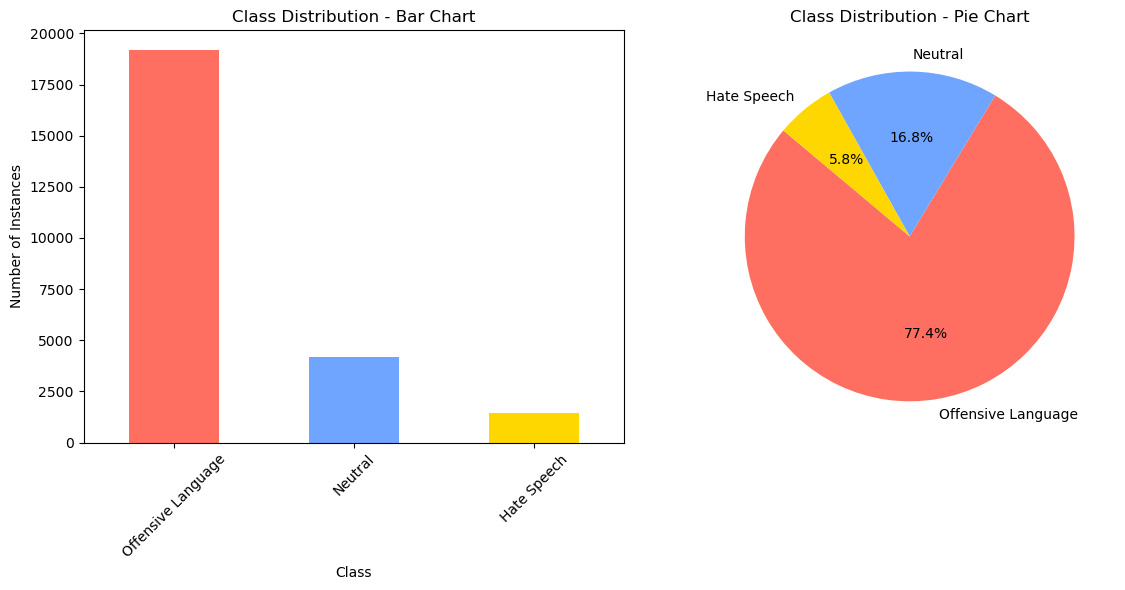

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'processed_train.csv'  
data = pd.read_csv(file_path)

# Calculate the data distribution for each class
distribution = data['class'].value_counts().rename(index={0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neutral'})

# Set the figure size for readability
plt.figure(figsize=(12, 6))

# Bar Chart
plt.subplot(1, 2, 1)
distribution.plot(kind='bar', color=['#FF6F61', '#6FA4FF', '#FFD700'])
plt.title('Class Distribution - Bar Chart')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.xticks(rotation=45)

# Pie Chart
plt.subplot(1, 2, 2)
distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#FF6F61', '#6FA4FF', '#FFD700'], startangle=140)
plt.title('Class Distribution - Pie Chart')
plt.ylabel('')  # Hide y-axis label for pie chart

# Display the plots
plt.tight_layout()

# Save the figure before showing it
plt.savefig('class_distribution_charts.png')

# Show the plots
plt.show()


In [25]:
plt.tight_layout()
plt.savefig('class_distribution_charts.png')
plt.show()

<Figure size 640x480 with 0 Axes>

# Text Vectorization and Handling Imbalance

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
X = df['processed_text']
y = df['class']

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

# Model Training and Evaluation

In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Train a Random Forest model

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Print classification report for Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))
print("-" * 60)


# Train a logistic Regression model

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
# Print classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("-" * 60)


#Train a SVM model

svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_model.score(X_test,y_test)
# Print classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("-" * 60)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3838
           1       0.98      0.95      0.96      3838
           2       0.97      0.99      0.98      3838

    accuracy                           0.97     11514
   macro avg       0.97      0.97      0.97     11514
weighted avg       0.97      0.97      0.97     11514

------------------------------------------------------------
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3838
           1       0.96      0.88      0.92      3838
           2       0.95      0.98      0.97      3838

    accuracy                           0.95     11514
   macro avg       0.95      0.95      0.95     11514
weighted avg       0.95      0.95      0.95     11514

------------------------------------------------------------
SVM Classification Report:
         

In [20]:
print(f"score of Random forest model = {model.score(X_test,y_test)} , Logistic Regression = { lr_model.score(X_test,y_test) },SVM = {svm_model.score(X_test,y_test)}")

score of Random forest model = 0.9740316136876845 , Logistic Regression = 0.9456314052457877,SVM = 0.9612645475073823
